# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [2]:
import pandas as pd
import re

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [76]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values=['Unknown', 'UNKNOWN','unknown', 'NO NAME'])
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [77]:
df.shape

(30000, 15)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29429 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3971 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

*Each row appears to be a dog that has been adopted in New York City. Owner Zip Code is where the dog presumably resides. Animal birth is presumably when the doggie was born, though is likely an estimate for many of them.*

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

*1) Where do most dogs live, and is this different from where most people live in NYC?* <br>
*2) Is there a relationship between breeds and values such as spayed/neutered?* <br>
*3) Which breeds live in which neighborhoods?* <br>
*4) What are the most common names?*

In [7]:
df['Animal Name'].value_counts().head(5)

Animal Name
UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Name: count, dtype: int64

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

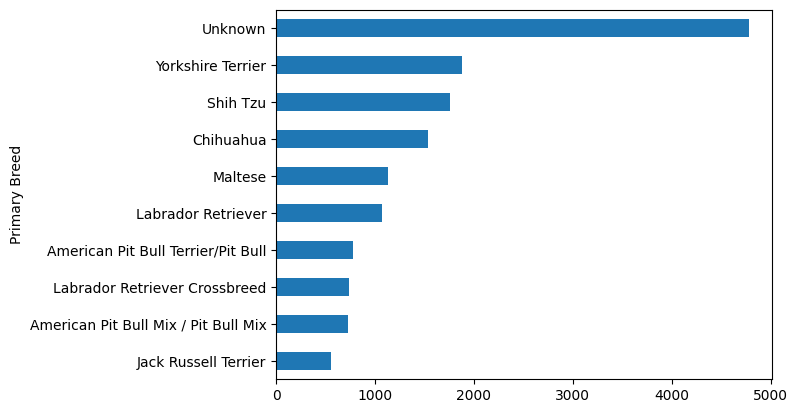

In [10]:
df['Primary Breed'].value_counts().head(10).sort_values().plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

<Axes: ylabel='Primary Breed'>

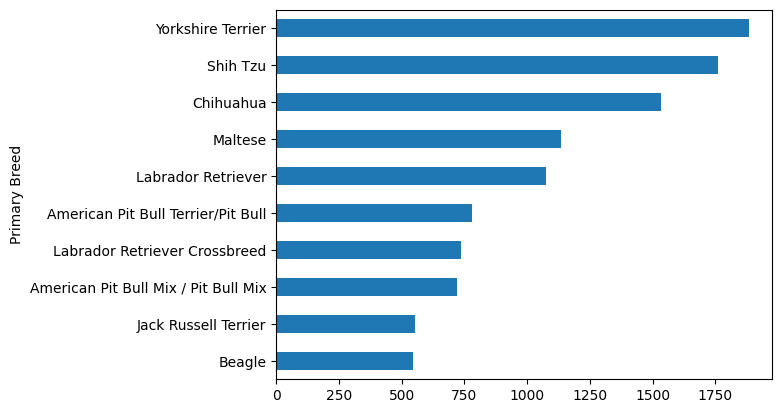

In [12]:
# Unknown marked as Na Values
df['Primary Breed'].value_counts().head(10).sort_values().plot(kind='barh')

## What are the most popular dog names?

<Axes: ylabel='Animal Name'>

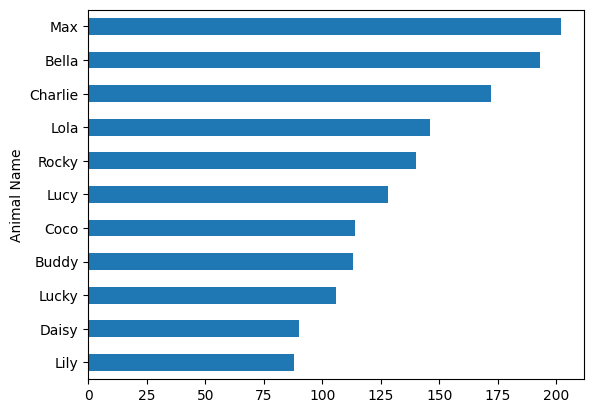

In [14]:
# Oh I already did this one!
df['Animal Name'].value_counts().head(11).sort_values().plot(kind='barh')

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [28]:
df[df['Animal Name'].isin(['Ari','Mary','Max','Maxwell'])]['Animal Name'].value_counts()

Animal Name
Max        202
Maxwell     11
Ari          4
Mary         1
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

In [29]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the actual numbers?

In [31]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [32]:
df['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [36]:
df['Guard or Trained'].fillna('No',inplace=True)
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [50]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts(dropna=False)

Primary Breed
NaN                           5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [49]:
df['Year'] = df['Animal Birth'].dt.year
df['Year'].value_counts().head(3)

Year
2014    2901
2013    2888
2012    2633
Name: count, dtype: int64

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [62]:
from datetime import datetime
df['Animal Birth'] = pd.to_datetime(df['Animal Birth'])
df['Age Days'] = datetime.strptime('2016-04-28','%Y-%m-%d') - df['Animal Birth']
df['Age'] = df['Age Days'].dt.days.astype(int) / 365
df['Age'].mean()

np.float64(6.7021936073059365)

# Joining data together

In [63]:
zips = pd.read_csv("zipcodes-neighborhoods.csv")
zips.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [79]:
merged = df.merge(zips, left_on='Owner Zip Code',right_on='zip', how='left')
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Greenwich Village and Soho,10013.0,Manhattan


In [87]:
merged[merged['Animal Name'] == 'Amigo']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,neighborhood,zip,borough
4752,10301,Amigo,M,NaN,Mixed,BLACK,NaN,NaN,2007-07-01,Yes,No,Yes,2015-04-29 08:36:37.807,2015-04-29,2016-05-28,Stapleton and St. George,10301.0,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [80]:
merged[merged['borough'] == 'Bronx']['Animal Name'].value_counts().head(3)

Animal Name
Bella    22
Max      21
Rocky    20
Name: count, dtype: int64

In [81]:
merged[merged['borough'] == 'Brooklyn']['Animal Name'].value_counts().head(3)

Animal Name
Max        46
Bella      45
Charlie    42
Name: count, dtype: int64

In [82]:
merged[merged['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts().head(3)

Animal Name
Charlie    19
Bella      12
Lola       10
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [123]:
merged.groupby(['neighborhood','Primary Breed'])['Primary Breed'].count().reset_index(name='count').sort_values(['neighborhood','count'],ascending=[True, False]).drop_duplicates('neighborhood').sort_values('count',ascending=False)

,neighborhood,Primary Breed,count
3691,Upper West Side,Labrador Retriever,121
3969,West Queens,Shih Tzu,95
3537,Upper East Side,Havanese,94
2805,South Shore,Shih Tzu,90
3092,Southern Brooklyn,Yorkshire Terrier,85
2912,Southeast Bronx,Shih Tzu,83
713,Chelsea and Clinton,Chihuahua,80
1816,Lower East Side,Chihuahua,77
3878,West Central Queens,Yorkshire Terrier,72
2389,Northwest Brooklyn,Labrador Retriever,72


#### *Is there an easier way to do this? There must be*

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [118]:
df[['Animal Gender','Spayed or Neut']].value_counts(normalize=True)

Animal Gender  Spayed or Neut
M              Yes               0.429133
F              Yes               0.392867
M              No                0.112800
F              No                0.065100
               Yes               0.000100
Name: proportion, dtype: float64

In [124]:
df.groupby('Animal Gender')['Spayed or Neut'].apply(lambda x: (x == 'Yes').mean())

Animal Gender
     1.000000
F    0.857850
M    0.791856
Name: Spayed or Neut, dtype: float64

In [126]:
df.groupby('Primary Breed')['Spayed or Neut'].apply(lambda x: (x == 'Yes').mean()).sort_values()

Primary Breed
Canaan Dog                  0.0
Borzoi                      0.0
Fila Brasileiro             0.0
Dogo Argentino              0.0
French Spaniel              0.0
                           ... 
Treeing Walker Coonhound    1.0
Standard Schnauzer          1.0
Tibetan Mastiff             1.0
Welsh Springer Spaniel      1.0
Xoloitzcuintli              1.0
Name: Spayed or Neut, Length: 250, dtype: float64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

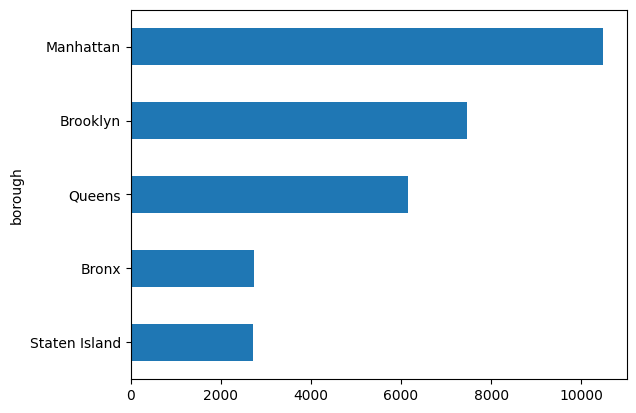

In [130]:
merged['borough'].value_counts().sort_values().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [132]:
pops = pd.read_csv("boro_population.csv")
pops.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [145]:
dogs = merged['borough'].value_counts().sort_values().reset_index(name='dogs')
dogs

,borough,dogs
0,Staten Island,2727
1,Bronx,2748
2,Queens,6154
3,Brooklyn,7466
4,Manhattan,10478


In [146]:
merged_pops = dogs.merge(pops, on='borough')
merged_pops

,borough,dogs,population,area_sqmi
0,Staten Island,2727,474558,59
1,Bronx,2748,1455444,42
2,Queens,6154,2339150,109
3,Brooklyn,7466,2636735,71
4,Manhattan,10478,1644518,23


In [150]:
merged_pops['Dogs per 1000 People'] = merged_pops['dogs'] / merged_pops['population'] * 1000
merged_pops

,borough,dogs,population,area_sqmi,Dogs per Capita,Dogs per 1000 People
0,Staten Island,2727,474558,59,0.005746,5.746400
1,Bronx,2748,1455444,42,0.001888,1.888084
2,Queens,6154,2339150,109,0.002631,2.630870
3,Brooklyn,7466,2636735,71,0.002832,2.831532
4,Manhattan,10478,1644518,23,0.006371,6.371472


<Axes: ylabel='borough'>

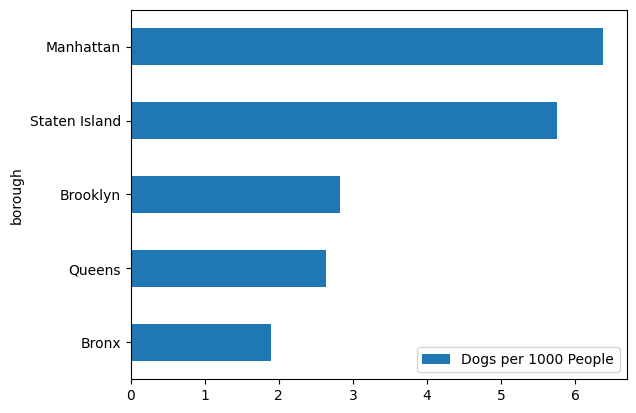

In [158]:
merged_pops[['borough','Dogs per 1000 People']].sort_values(by='Dogs per 1000 People').plot(kind='barh',x='borough')

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [160]:
breed_counts = merged.groupby(['borough','Primary Breed']).size().reset_index(name='Count')
breed_counts

,borough,Primary Breed,Count
0,Bronx,Afghan Hound,1
1,Bronx,Akita,5
2,Bronx,Akita Crossbreed,2
3,Bronx,Alaskan Malamute,2
4,Bronx,American Bully,5
...,...,...,...
894,Staten Island,Wheaton Terrier,11
895,Staten Island,Whippet,1
896,Staten Island,Wire Fox Terrier,5
897,Staten Island,Yorkshire Terrier,171


In [177]:
top5_breeds = breed_counts.sort_values(['borough','Count'],ascending=[True,False]).groupby('borough').head(5)
top5_breeds

,borough,Primary Breed,Count
145,Bronx,Yorkshire Terrier,250
128,Bronx,Shih Tzu,244
41,Bronx,Chihuahua,208
7,Bronx,American Pit Bull Terrier/Pit Bull,181
90,Bronx,Maltese,139
353,Brooklyn,Yorkshire Terrier,501
325,Brooklyn,Shih Tzu,481
198,Brooklyn,Chihuahua,391
262,Brooklyn,Labrador Retriever,255
267,Brooklyn,Maltese,247


<Axes: ylabel='Primary Breed'>

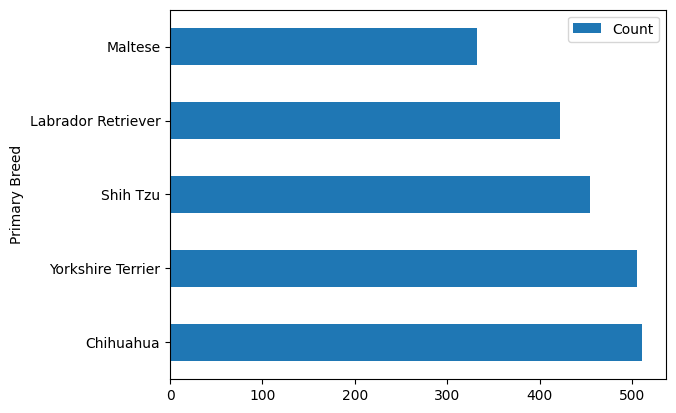

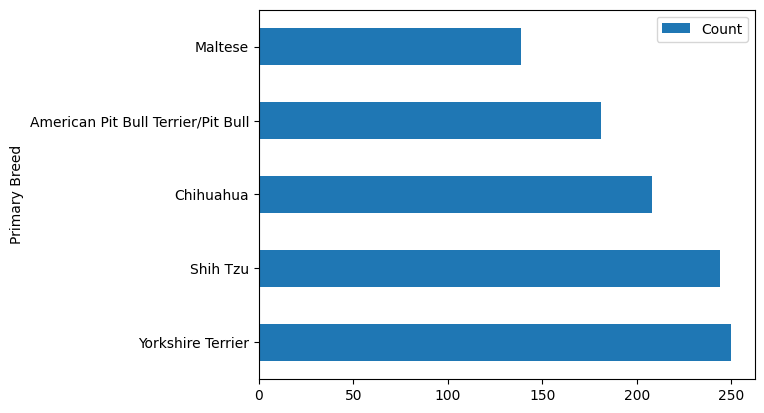

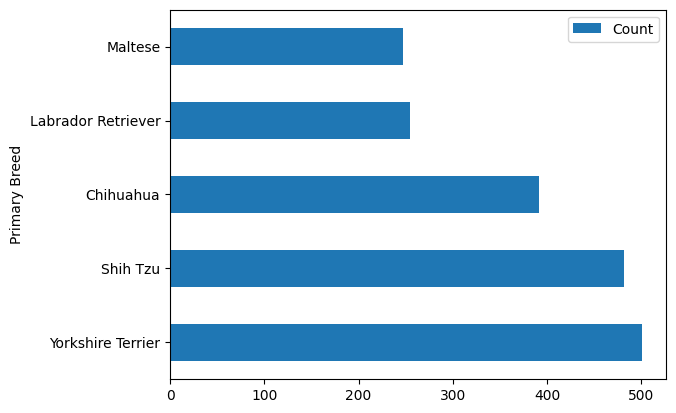

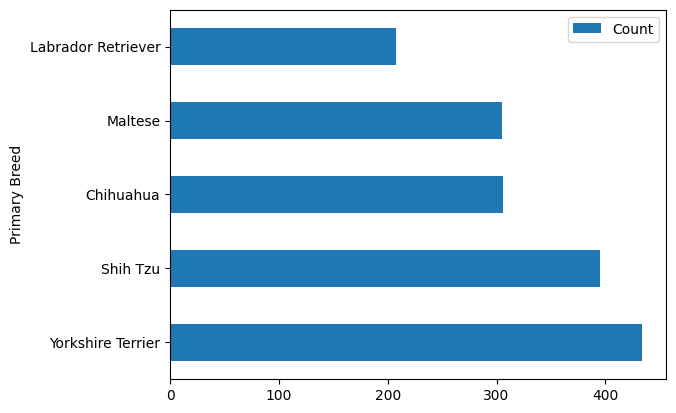

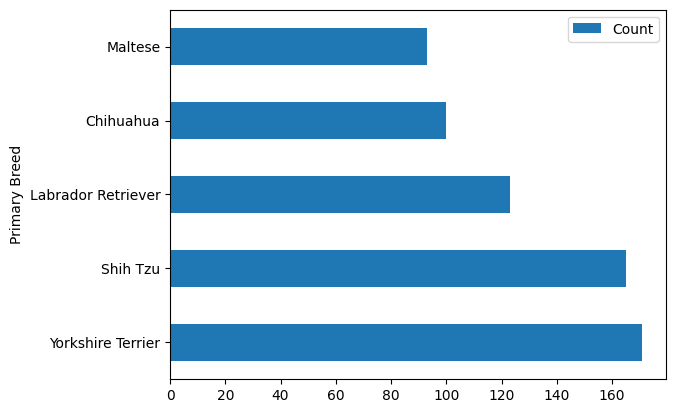

In [181]:
top5_breeds[top5_breeds['borough']=='Manhattan'].plot(kind='barh',x='Primary Breed')
top5_breeds[top5_breeds['borough']=='Bronx'].plot(kind='barh',x='Primary Breed')
top5_breeds[top5_breeds['borough']=='Brooklyn'].plot(kind='barh',x='Primary Breed')
top5_breeds[top5_breeds['borough']=='Queens'].plot(kind='barh',x='Primary Breed')
top5_breeds[top5_breeds['borough']=='Staten Island'].plot(kind='barh',x='Primary Breed')